# Hotel Booking Reservation Analysis
### ALP Data Mining Responsi

By Group 6:
1. Evelyn Komalasari H. / 0706022310001
2. Felicia Kathrin V. H. / 0706022310002
3. Evelin Alim N. / 0706022310021

Dataset : Hotel Booking Reservation from Kaggle (https://www.kaggle.com/datasets/kundanbedmutha/hotel-booking-reservation)


## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

## Business Objective

The Business Objective from this dataset is to **secure hotel revenue streams and profits by predicting bookings cancellation**. By understanding the possibility of bookings cancellation, the hotel can take preventive measure, such as contacting customer, to ensure income continues to flow smoothly.

## Data Understanding

This dataset ini contains detailed information about hotel bookings with 119.390 instances dan 33 columns (32 feature inputs dan 1 target variable)

Column Description (Target variable : **is_canceled**):
| **Feature**|**Description**                                               | **Type / Scale**|
| -------- | ------------ | ------------- |
| **hotel**| Name/type of hotel | Categorical |
| **is_canceled**| Value indicating if the booking was canceled (1) or not (0) | Categorical |
| **lead_time**| Number of days between booking date and arrival date | Numeric (integer) |
| **arrival_date_year**| Year of arrival | Categorical |
| **arrival_date_month**| Month of arrival | Categorical |
| **arrival_date_week_number**| Week number of arrival | Numeric (integer) |
| **arrival_date_day_of_month**| Day of the month of arrival | Numeric (integer) |
| **stays_in_weekend_nights**| Number of weekend nights stayed (Saturday or Sunday) | Numeric (integer) |
| **stays_in_week_nights**| Number of weekday nights stayed (Monday to Friday) | Numeric (integer) |
| **adults**| Number of adults | Numeric (integer) |
| **children**| Number of children | Numeric (integer) |
| **babies**| Number of babies | Numeric (integer) |
| **meal**| Type of meal booked | Categorical (Undefined/SC - no meal package; BB – Bed & Breakfast; HB – Half board; FB – Full board)|
| **country**| Country of origin| Categorical (ISO format)|
| **market_segment**| Market segment designation | Categorical (TA - Travel Agents; TO - Tour Operators)|
| **distribution_channel**| Booking distribution channel |  Categorical (TA - Travel Agents; TO - Tour Operators)|
| **is_repeated_guest**| Value indicating if the booking name was from a repeated guest (1) or not (0)|  Categorical|
| **previous_cancellations**| Number of previous bookings that were cancelled by the customer prior to the current booking | Numeric (integer) |
| **previous_bookings_not_canceled**| Number of previous bookings not cancelled by the customer prior to the current booking | Numeric (integer) |
| **reserved_room_type**| Code of room type reserved |  Categorical |
| **assigned_room_type**| Code of room type reserved |  Categorical |
| **booking_changes**| Number of changes/amendments made to the booking from it was booked until check-in or cancellation | Numeric (integer)  |
| **deposit_type**| Indication on if the customer made a deposit to guarantee the booking |  Categorical (No Deposit; Non Refund; Refundable) |
| **agent**| ID of the travel agency that made the booking |  Categorical |
| **company**| ID of the company/entity that made the booking or responsible for paying the booking |  Categorical |
| **days_in_waiting_list**| Number of days the booking was in the waiting list before it was confirmed to the customer | Numeric (integer)  |
| **customer_type**| Type of booking | Categorical (Contract; Group; Transient; Transient-party)|
| **adr**| Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights | Continuous (float) |
| **required_car_parking_spaces**| Number of car parking spaces required by the customer | Numeric (integer) |
| **total_of_special_requests**| Number of special requests made by the customer (e.g. twin bed or high floor)| Numeric (integer) |
| **reservation_status**| Reservation last status |  Categorical (Canceled; Check-Out; No-Show)|
| **reservation_status_date**| Date at which the last status was set | Date |
| **city**| City where the hotel is located |  Categorical |

The reservation_status and reservation_status_date columns may cause a data leakage because this variable is only known after the event occurs, so it won't be used for input feature

In [2]:
# Load dataset
pd.set_option('display.max_columns', None)

url = "https://raw.githubusercontent.com/evelinn11/datasets/refs/heads/main/hotel_bookings_dataset.csv"
df = pd.read_csv(url, sep= ",")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow


In [3]:
# Info from the dataset, checking null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

From the info above, there are several column that has some null values which are children, country, agent, and company. We need to handle the missing value in data preparation.

In [4]:
# Statistical info from numerical variable
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2024.0,26.375835,15.723394,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.0,15.021596,8.805079,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2024.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2024.0,13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2024.0,26.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2024.0,39.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2024.0,52.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


There are some info we could intrepret from the statistic above, the arrival date value is 2024, which mean this column has the same value on all instances. Not only that, there are some unusual range from some of the column above:
1. Lead time maximum value is 737 which means there is a reservation that have been booked more than 2 years prior which is unusual, this creates a possibility of being an outlier

2. The maximum value of adults is 55, which is unusual for a room to be occupied by 55 adults. This is an outlier that must be highlighted

3. Days in waiting list maximum value is 391 which means this booking is not confirmed for more than a year, this is an unusual value and could be an outlier

4. ADR minimum value is a negative value, this is unusual and could indicate error in the data or there are large refund in a day

In [5]:
# Check for duplicate value
df.duplicated().sum()

np.int64(0)

There is no duplicated value from the dataset

In [6]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'hotel': array(['Resort Hotel - Chandigarh', 'Resort Hotel - Mumbai',
        'Resort Hotel - Delhi', 'Resort Hotel - Kolkata',
        'Resort Hotel - Lucknow', 'Resort Hotel - Indore',
        'Resort Hotel - Ahmedabad', 'Resort Hotel - Pune',
        'Resort Hotel - Chennai', 'Resort Hotel - Bhopal',
        'Resort Hotel - Hyderabad', 'Resort Hotel - Kochi',
        'Resort Hotel - Bangalore', 'Resort Hotel - Jaipur',
        'Resort Hotel - Goa', 'City Hotel - Ahmedabad',
        'City Hotel - Indore', 'City Hotel - Jaipur', 'City Hotel - Pune',
        'City Hotel - Hyderabad', 'City Hotel - Bhopal',
        'City Hotel - Kolkata', 'City Hotel - Mumbai',
        'City Hotel - Bangalore', 'City Hotel - Lucknow',
        'City Hotel - Chennai', 'City Hotel - Chandigarh',
        'City Hotel - Delhi', 'City Hotel - Kochi', 'City Hotel - Goa'],
       dtype=object),
 'is_canceled': array([0, 1]),
 'lead_time': array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
 

This validates that the arrival_date_year column has only 1 unique value. We will not use this column for prediction.

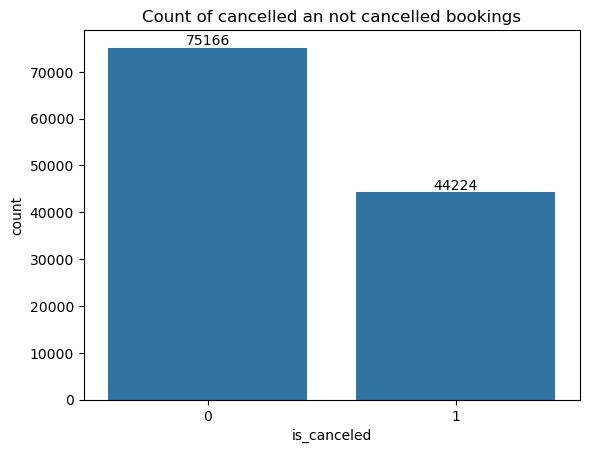

In [7]:
# Show how many cancellations
ax = sns.countplot(data=df, x='is_canceled')
plt.title('Count of cancelled an not cancelled bookings')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

The graph show an imbalanced instances count for is_canceled = 0 (false) and is_canceled = 1 (true). To make a better prediction the dataset needs to be balanced, so we need to do oversampling/undersampling method.

## Data Preparation

In [8]:
# Removing unnecessary columns
df = df.drop(['arrival_date_year', 'reservation_status', 'reservation_status_date'], axis=1)
df.drop_duplicates(inplace=True)

In [9]:
# Impute the undefined value in meal to SC because it has the same meaning
df['meal'] = df['meal'].replace('Undefined', 'SC')

# Drop undefined market_segment and distribution_channels
df = df[df['market_segment'] != 'Undefined']
df = df[df['distribution_channel'] != 'Undefined']

In [10]:
# Handling missing values
df['children'] = df['children'].fillna(0).astype(int)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0).astype(int) # 0 = No agent
df['company'] = df['company'].fillna(0).astype(int) #0 = Not booked by company

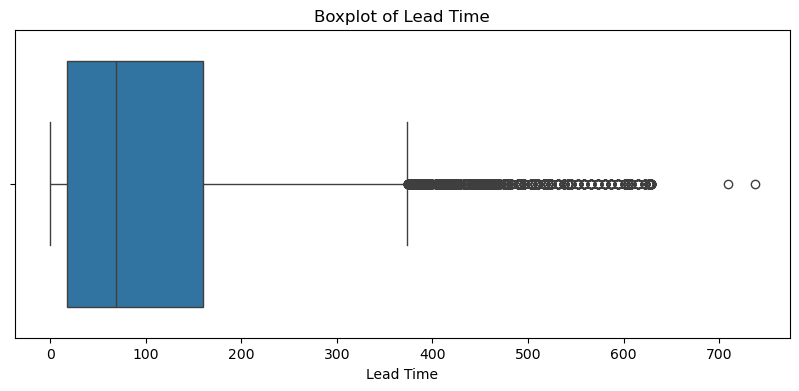

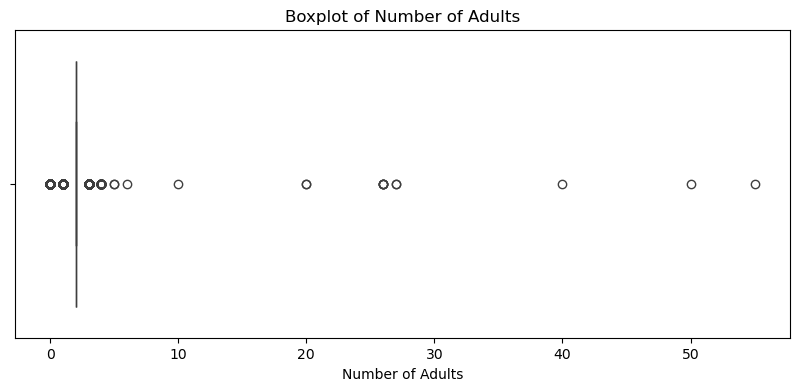

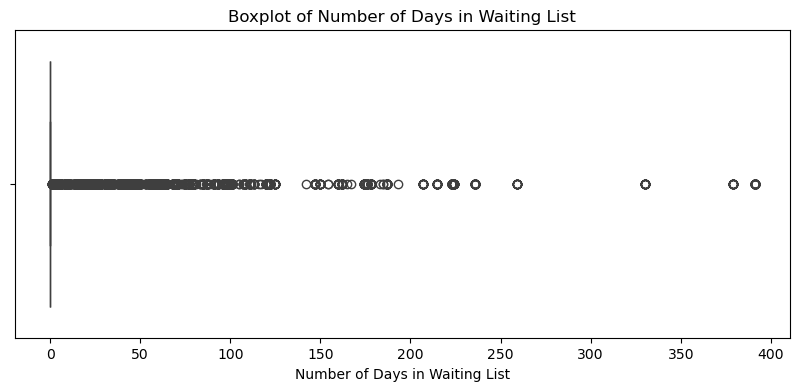

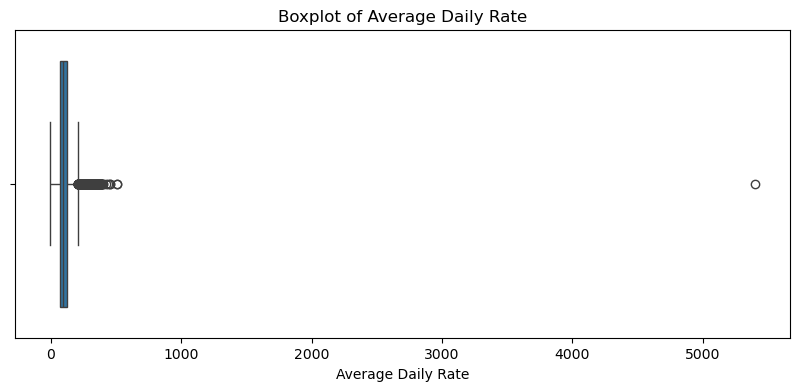

In [11]:
# Visualizing column with potential outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['lead_time'])
plt.title('Boxplot of Lead Time')
plt.xlabel('Lead Time')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['adults'])
plt.title('Boxplot of Number of Adults')
plt.xlabel('Number of Adults')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['days_in_waiting_list'])
plt.title('Boxplot of Number of Days in Waiting List')
plt.xlabel('Number of Days in Waiting List')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of Average Daily Rate')
plt.xlabel('Average Daily Rate')
plt.show()

This boxplots shows some outliers that need to be dropped, to ensure a clean data

In [12]:
# Dropping outliers
df = df[df['lead_time'] <= 730] # dropping more than 2 years
df = df[df['adults'] <= 10]
df = df[df['days_in_waiting_list'] <= 150]
df = df[(df['adr'] >= 0) & (df['adr'] <= 1000)]

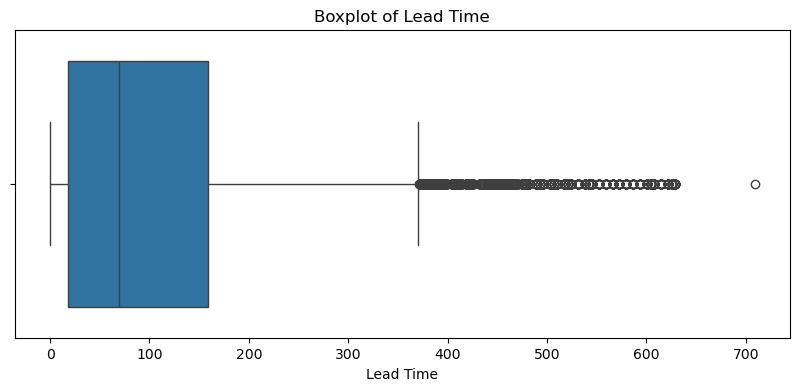

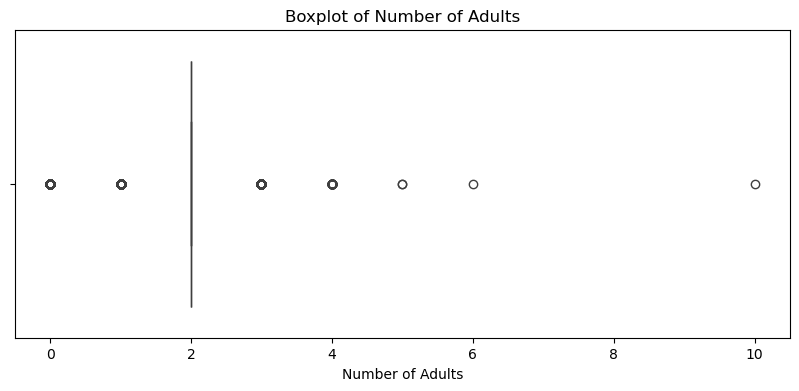

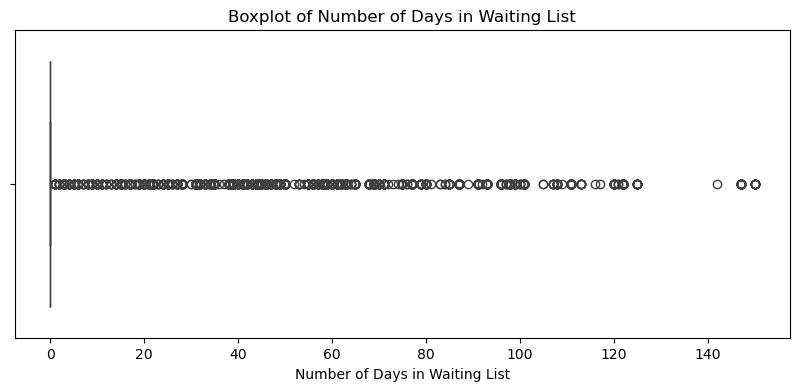

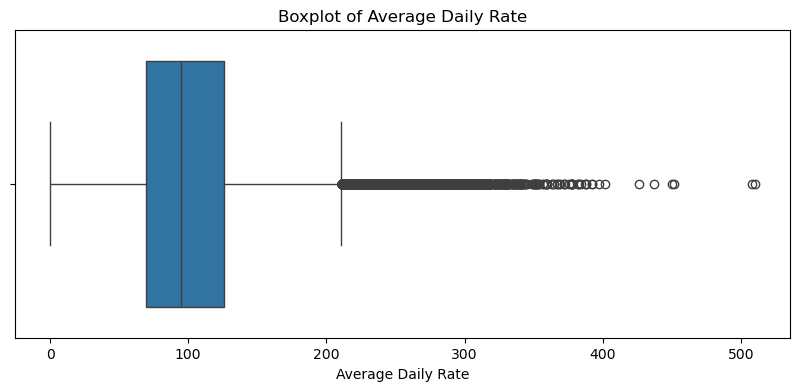

In [13]:
# Visualizing column after cleaning
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['lead_time'])
plt.title('Boxplot of Lead Time')
plt.xlabel('Lead Time')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['adults'])
plt.title('Boxplot of Number of Adults')
plt.xlabel('Number of Adults')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['days_in_waiting_list'])
plt.title('Boxplot of Number of Days in Waiting List')
plt.xlabel('Number of Days in Waiting List')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['adr'])
plt.title('Boxplot of Average Daily Rate')
plt.xlabel('Average Daily Rate')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118872 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118872 non-null  object 
 1   is_canceled                     118872 non-null  int64  
 2   lead_time                       118872 non-null  int64  
 3   arrival_date_month              118872 non-null  object 
 4   arrival_date_week_number        118872 non-null  int64  
 5   arrival_date_day_of_month       118872 non-null  int64  
 6   stays_in_weekend_nights         118872 non-null  int64  
 7   stays_in_week_nights            118872 non-null  int64  
 8   adults                          118872 non-null  int64  
 9   children                        118872 non-null  int64  
 10  babies                          118872 non-null  int64  
 11  meal                            118872 non-null  object 
 12  country              

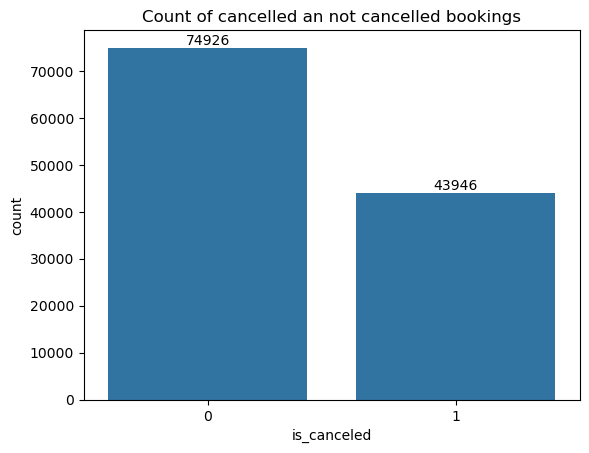

In [15]:
# Show how many cancellations
ax = sns.countplot(data=df, x='is_canceled')
plt.title('Count of cancelled an not cancelled bookings')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

## Exploratory Data Analysis

### Correlation Heatmap of Numerical Variables

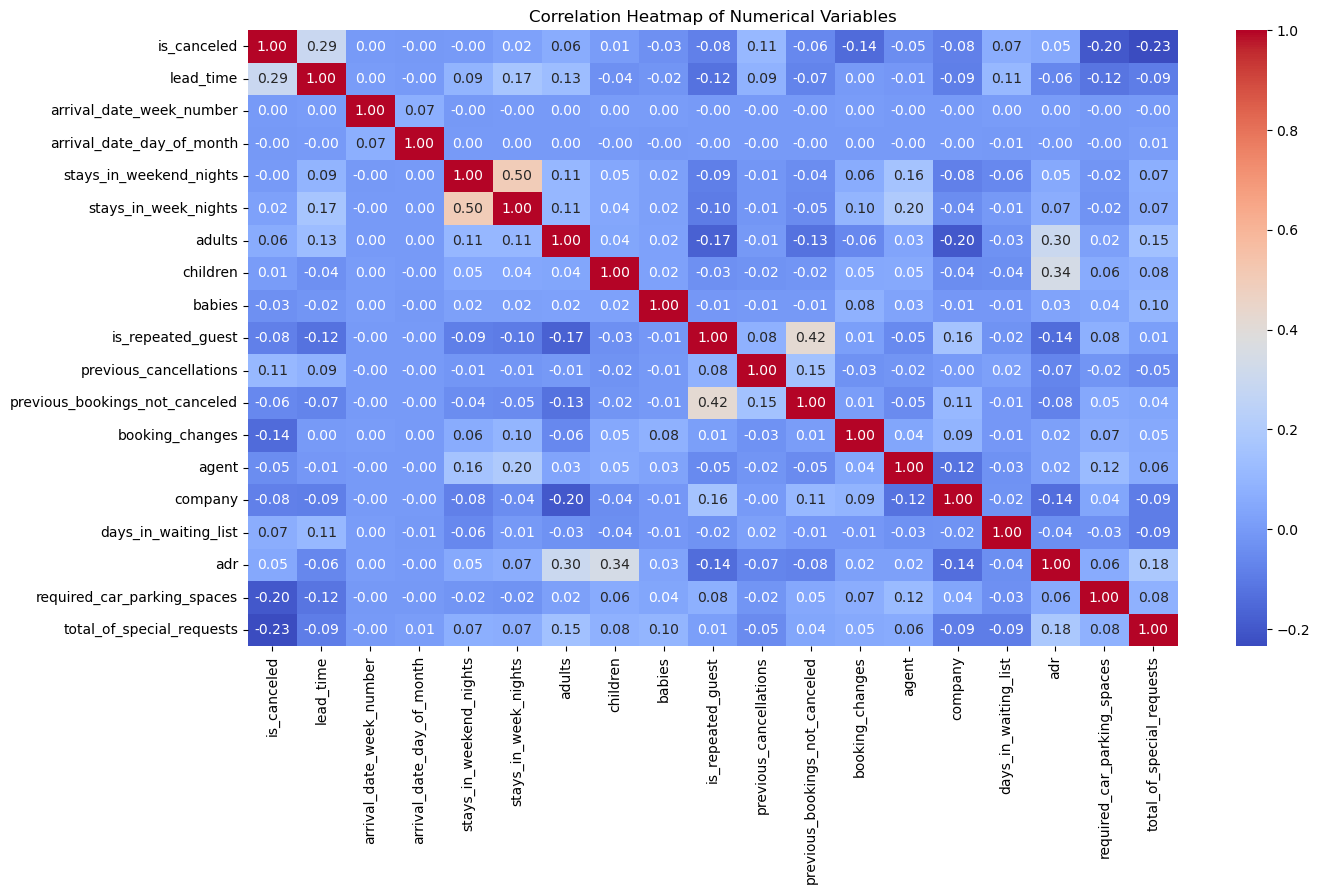

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

There is a moderate positive correlation between **lead_time** and **is_canceled**. This indicates that the longer the lead time, the higher the risk of cancellation (possibly due to changing plans). Not only that, **total_of_special_requests** is typically negatively correlated with **is_canceled**. This means that guests who make various requests are more likely to be serious about attending, meaning they won't cancel.

### Bar Chart Cancellation Rate by Market Segment

C:\Users\lyn\AppData\Local\Temp\ipykernel_21872\3050175702.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='Reds_r')


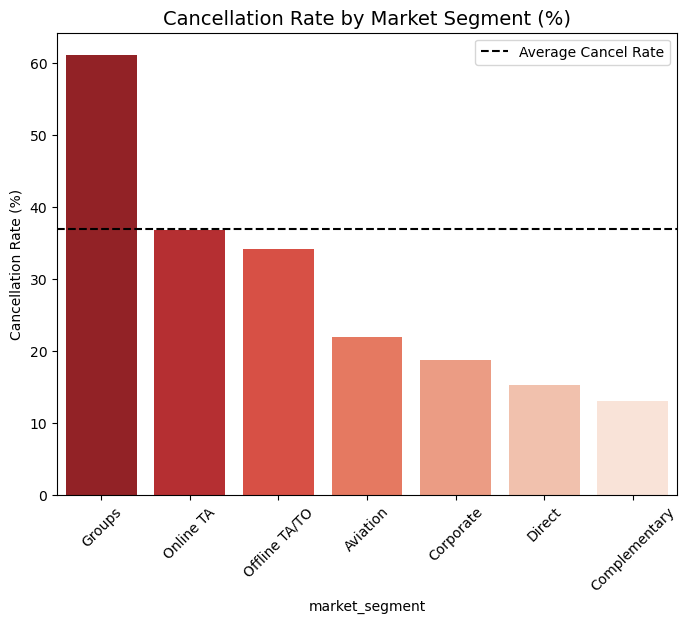

In [17]:
plt.figure(figsize=(8, 6))
cancel_rate = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False) * 100
sns.barplot(x=cancel_rate.index, y=cancel_rate.values, palette='Reds_r')
plt.title('Cancellation Rate by Market Segment (%)', fontsize=14)
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=45)
plt.axhline(y=df['is_canceled'].mean()*100, color='k', linestyle='--', label='Average Cancel Rate')
plt.legend()
plt.show()

The Groups segment has the highest cancellation rate. This is risky for hotels because group cancellations mean many rooms are vacant at once.

### Histogram

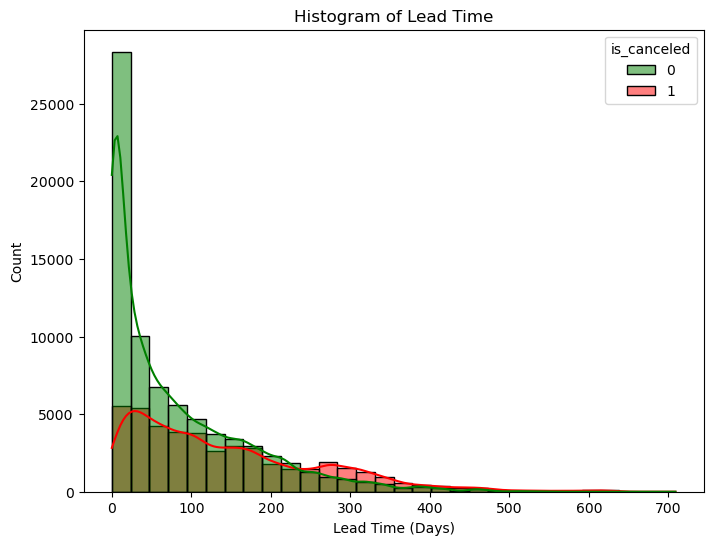

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=30, kde=True,
             palette={0: 'green', 1: 'red'}, alpha=0.5)
plt.title('Histogram of Lead Time')
plt.xlabel('Lead Time (Days)')
plt.show()

The distribution of Check-In guests (Green) is concentrated in short lead times (<50 days). In contrast, the Cancellation curve (Red) widens to the right (long lead times). This validates the hypothesis that long-term bookings are riskier.

In [19]:
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'city'],
      dtype='object')


'hotel', 'lead_time', 'arrival_date_month', 'stays_in_weekend_nights',
     'stays_in_week_nights', 'adults', 'children', 'meal', 'market_segment',
     'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
     'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
     'customer_type', 'adr', 'required_car_parking_spaces',
     'total_of_special_requests'

## Feature Engineering

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

df_all = df.copy()
# 1. Ordinal Encoding
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_all['arrival_date_month'] = df_all['arrival_date_month'].map(month_map)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type',
                'assigned_room_type', 'deposit_type', 'customer_type', 'city'
                ]
encoder = OrdinalEncoder()
df_all[nominal_cols] = encoder.fit_transform(df_all[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_all.sample(n = 5)


{'assigned_room_type': {'A': 0,
                        'B': 1,
                        'C': 2,
                        'D': 3,
                        'E': 4,
                        'F': 5,
                        'G': 6,
                        'H': 7,
                        'I': 8,
                        'K': 9,
                        'L': 10,
                        'P': 11},
 'city': {'Ahmedabad': 0,
          'Bangalore': 1,
          'Bhopal': 2,
          'Chandigarh': 3,
          'Chennai': 4,
          'Delhi': 5,
          'Goa': 6,
          'Hyderabad': 7,
          'Indore': 8,
          'Jaipur': 9,
          'Kochi': 10,
          'Kolkata': 11,
          'Lucknow': 12,
          'Mumbai': 13,
          'Pune': 14},
 'country': {'ABW': 0,
             'AGO': 1,
             'AIA': 2,
             'ALB': 3,
             'AND': 4,
             'ARE': 5,
             'ARG': 6,
             'ARM': 7,
             'ASM': 8,
             'ATA': 9,
             'ATF': 10,

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,city
54598,5.0,1,379,7,28,13,0,2,2,0,0,0.0,135.0,4.0,3.0,0,0,0,0.0,0.0,0,1.0,1,0,0,2.0,62.0,0,0,5.0
107435,12.0,0,67,7,30,22,1,2,2,0,0,0.0,59.0,6.0,3.0,0,0,0,0.0,0.0,0,0.0,9,0,0,2.0,106.2,1,1,12.0
41398,13.0,1,40,3,12,19,2,2,2,0,0,0.0,135.0,4.0,3.0,0,0,0,0.0,0.0,0,0.0,1,0,0,3.0,62.0,0,0,13.0
76179,4.0,1,261,8,33,12,0,1,2,0,0,2.0,135.0,5.0,3.0,0,1,0,0.0,0.0,0,1.0,6,0,0,3.0,120.0,0,0,4.0
36414,28.0,0,128,3,10,7,2,5,2,0,0,0.0,59.0,6.0,3.0,0,0,0,4.0,4.0,0,0.0,175,0,0,2.0,82.8,0,0,13.0


In [21]:
df.loc[117972]

hotel                             City Hotel - Jaipur
is_canceled                                         0
lead_time                                         125
arrival_date_month                              April
arrival_date_week_number                           15
arrival_date_day_of_month                          12
stays_in_weekend_nights                             0
stays_in_week_nights                                4
adults                                              2
children                                            0
babies                                              0
meal                                               BB
country                                           USA
market_segment                                 Direct
distribution_channel                           Direct
is_repeated_guest                                   0
previous_cancellations                              0
previous_bookings_not_canceled                      0
reserved_room_type          

In [22]:
# df_all.info()

## Declare feature vector and target variable


In [23]:
X = df_all.drop('is_canceled', axis=1)
y = df_all['is_canceled']

## Split Data

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

# ini datanya ga balance, di test set nomor 0 dia bagus dapet 0.8 ann. tapi di nmr1 dia jelek krn cuman 0.3 aja


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59969
           1       1.00      1.00      1.00     35128

    accuracy                           1.00     95097
   macro avg       1.00      1.00      1.00     95097
weighted avg       1.00      1.00      1.00     95097


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     14957
           1       0.76      0.77      0.77      8818

    accuracy                           0.83     23775
   macro avg       0.81      0.81      0.81     23775
weighted avg       0.83      0.83      0.83     23775



## Tuning Decision Tree

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0, 41, 42]

}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

y_pred_train_dt_best = grid_search.predict(X_train)
y_pred_test_dt_best = grid_search.predict(X_test)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

# print("\n=== Classification Report (Train Set) ===")
# print(classification_report(y_train, y_pred_train_dt_best))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_dt_best))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 20, 'random_state': 42}
Best cross-validation f1 score: 0.791

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     14957
           1       0.81      0.78      0.80      8818

    accuracy                           0.85     23775
   macro avg       0.84      0.84      0.84     23775
weighted avg       0.85      0.85      0.85     23775



## FEATURE IMPORTANCE DECISION TREE

In [27]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.02790565 0.11118552 0.01799742 0.03472595 0.04315032 0.01653248
 0.02864031 0.00793128 0.0038596  0.00054283 0.00845596 0.07420204
 0.06695909 0.0027336  0.00172731 0.02321214 0.00533268 0.0096283
 0.01407914 0.01474685 0.23136446 0.05840602 0.00249001 0.00285092
 0.02009155 0.0752187  0.02394454 0.04931582 0.02276949]


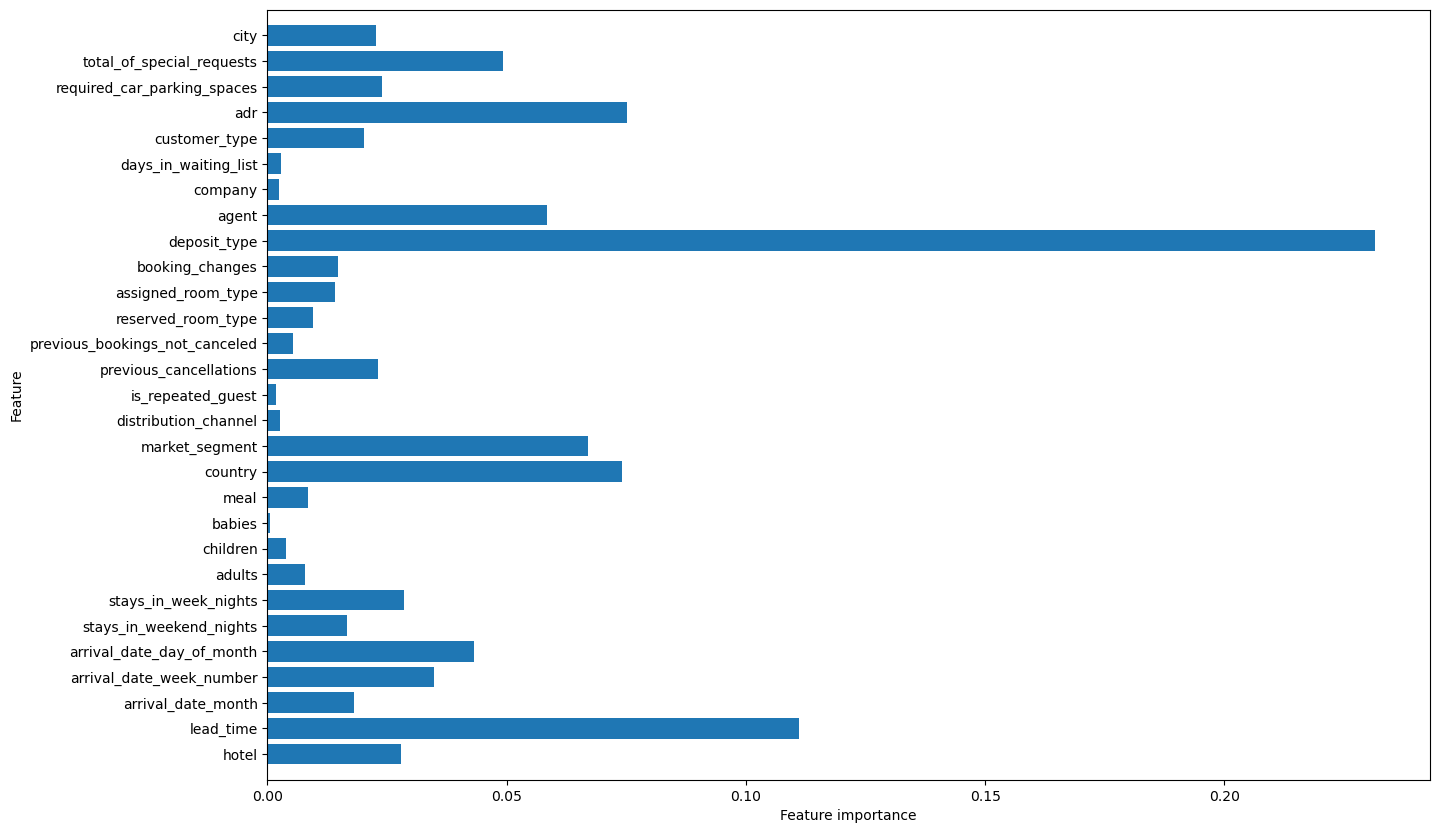

In [28]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [29]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

deposit_type      0.231364
lead_time         0.111186
adr               0.075219
country           0.074202
market_segment    0.066959
agent             0.058406
dtype: float64

In [30]:
# using only important features for the prediction

important_column = important_features.index.tolist()
X_importance = df_all[important_column] #input
y_importance = df_all['is_canceled'] #target

In [31]:
display(X_importance)
display(y_importance)

,deposit_type,lead_time,adr,country,market_segment,agent
0,0.0,342,0.00,135.0,3.0,0
2,0.0,7,75.00,59.0,3.0,0
3,0.0,13,75.00,59.0,2.0,304
4,0.0,14,98.00,59.0,6.0,240
5,0.0,14,98.00,59.0,6.0,240
...,...,...,...,...,...,...
119385,0.0,23,96.14,15.0,5.0,394
119386,0.0,102,225.43,56.0,6.0,9
119387,0.0,34,157.71,43.0,6.0,9
119388,0.0,109,104.40,59.0,6.0,89


0         0
2         0
3         0
4         0
5         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118872, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((95097, 6), (23775, 6))

In [33]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     52526
           1       0.99      0.96      0.98     30684

    accuracy                           0.98     83210
   macro avg       0.99      0.98      0.98     83210
weighted avg       0.98      0.98      0.98     83210


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     22400
           1       0.75      0.75      0.75     13262

    accuracy                           0.81     35662
   macro avg       0.80      0.80      0.80     35662
weighted avg       0.81      0.81      0.81     35662



## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
y_pred_train_random = model.predict(X_train)
y_pred_test_random = model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_random))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_random))

# ini datanya ga balance, di test set nomor 0 dia bagus dapet 0.8 ann. tapi di nmr1 dia jelek krn cuman 0.3 aja


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59969
           1       0.99      0.97      0.98     35128

    accuracy                           0.98     95097
   macro avg       0.98      0.98      0.98     95097
weighted avg       0.98      0.98      0.98     95097


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     14957
           1       0.80      0.76      0.78      8818

    accuracy                           0.84     23775
   macro avg       0.83      0.82      0.83     23775
weighted avg       0.84      0.84      0.84     23775



## Tuning Random Forest

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'bootstrap': [True, False]
              }

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# y_pred_train_rd_best = grid_search.predict(X_train)
y_pred_test_rd_best = grid_search.predict(X_test)

# best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
# y_pred_test = best_dtree_clf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_rd_best))

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     14957
           1       0.81      0.74      0.77      8818

    accuracy                           0.84     23775
   macro avg       0.83      0.82      0.82     23775
weighted avg       0.84      0.84      0.84     23775



## FEATURE IMPORTANCE Random Forest

In [37]:
print("Feature importances:\n{}".format(model.feature_importances_)) #function for feature importance

Feature importances:
[0.16571128 0.27496525 0.26183594 0.15915713 0.0581125  0.08021789]


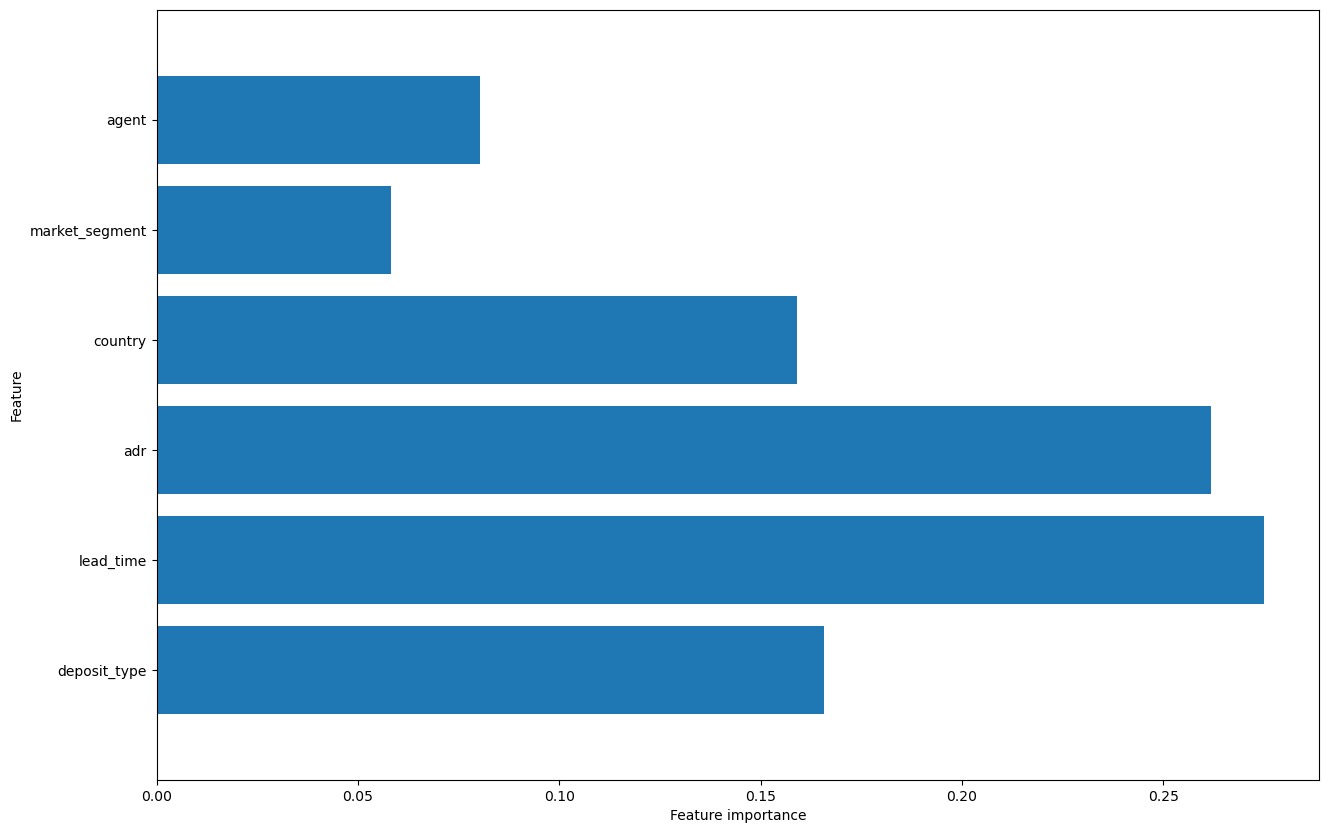

In [38]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(model)

In [39]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

lead_time         0.274965
adr               0.261836
deposit_type      0.165711
country           0.159157
agent             0.080218
market_segment    0.058113
dtype: float64

In [40]:
# using only important features for the prediction

important_column = important_features.index.tolist()
X_importance = df_all[important_column] #input
y_importance = df_all['is_canceled'] #target

In [41]:
display(X_importance)
display(y_importance)

,lead_time,adr,deposit_type,country,agent,market_segment
0,342,0.00,0.0,135.0,0,3.0
2,7,75.00,0.0,59.0,0,3.0
3,13,75.00,0.0,59.0,304,2.0
4,14,98.00,0.0,59.0,240,6.0
5,14,98.00,0.0,59.0,240,6.0
...,...,...,...,...,...,...
119385,23,96.14,0.0,15.0,394,5.0
119386,102,225.43,0.0,56.0,9,6.0
119387,34,157.71,0.0,43.0,9,6.0
119388,109,104.40,0.0,59.0,89,6.0


0         0
2         0
3         0
4         0
5         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118872, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((95097, 6), (23775, 6))

In [43]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.2, random_state=42)

importance_rd = RandomForestClassifier()
importance_rd.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_rd.predict(X_train_importance)
y_pred_test_importance = importance_rd.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     59969
           1       0.99      0.97      0.98     35128

    accuracy                           0.98     95097
   macro avg       0.98      0.98      0.98     95097
weighted avg       0.98      0.98      0.98     95097


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14957
           1       0.79      0.76      0.78      8818

    accuracy                           0.84     23775
   macro avg       0.83      0.82      0.82     23775
weighted avg       0.84      0.84      0.84     23775



In [44]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'hotel',
    'arrival_date_month',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'city'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((119881, 29), (29971, 29))

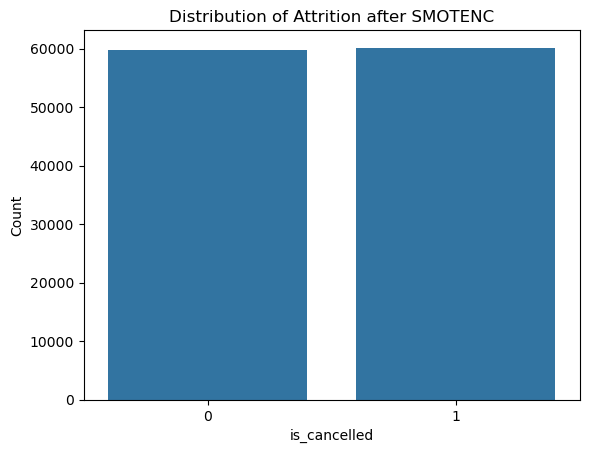

In [45]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('is_cancelled')
plt.ylabel('Count')
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118872 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118872 non-null  object 
 1   is_canceled                     118872 non-null  int64  
 2   lead_time                       118872 non-null  int64  
 3   arrival_date_month              118872 non-null  object 
 4   arrival_date_week_number        118872 non-null  int64  
 5   arrival_date_day_of_month       118872 non-null  int64  
 6   stays_in_weekend_nights         118872 non-null  int64  
 7   stays_in_week_nights            118872 non-null  int64  
 8   adults                          118872 non-null  int64  
 9   children                        118872 non-null  int64  
 10  babies                          118872 non-null  int64  
 11  meal                            118872 non-null  object 
 12  country              

## DECISION TREE SMOTENC

In [47]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59708
           1       1.00      1.00      1.00     60173

    accuracy                           1.00    119881
   macro avg       1.00      1.00      1.00    119881
weighted avg       1.00      1.00      1.00    119881


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     15218
           1       0.83      0.84      0.83     14753

    accuracy                           0.84     29971
   macro avg       0.84      0.84      0.84     29971
weighted avg       0.84      0.84      0.84     29971



## DECISION TREE TUNING PAKE SMOTENC NI

In [48]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 9, 12, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [0, 41, 42]

}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

y_pred_train_dt_best = grid_search.predict(X_train)
y_pred_test_dt_best = grid_search.predict(X_test)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

# print("\n=== Classification Report (Train Set) ===")
# print(classification_report(y_train, y_pred_train_dt_best))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_dt_best))

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 20, 'random_state': 0}
Best cross-validation f1 score: 0.851

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     15218
           1       0.85      0.86      0.86     14753

    accuracy                           0.86     29971
   macro avg       0.86      0.86      0.86     29971
weighted avg       0.86      0.86      0.86     29971



## RANDOM FOREST SMOTENC

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_train_random = model.predict(X_train)
y_pred_test_random = model.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train_random))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_random))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     59708
           1       1.00      1.00      1.00     60173

    accuracy                           1.00    119881
   macro avg       1.00      1.00      1.00    119881
weighted avg       1.00      1.00      1.00    119881


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     15218
           1       0.90      0.87      0.88     14753

    accuracy                           0.89     29971
   macro avg       0.89      0.89      0.89     29971
weighted avg       0.89      0.89      0.89     29971



## RANDOM FOREST TUNING SMOTENC

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'bootstrap': [True, False]
              }

grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# y_pred_train_rd_best = grid_search.predict(X_train)
y_pred_test_rd_best = grid_search.predict(X_test)

# best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
# y_pred_test = best_dtree_clf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test_rd_best))

Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Estimator: RandomForestClassifier(bootstrap=False, n_estimators=200)

=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.90      0.89     15218
           1       0.90      0.88      0.89     14753

    accuracy                           0.89     29971
   macro avg       0.89      0.89      0.89     29971
weighted avg       0.89      0.89      0.89     29971



## Insights, intrepretation, & Conclusion

Insights:

The model evaluation reveals a consistent pattern each tries. Whereas Decision Tree models achieve extremely high performance on training data but experience a notable decline on test data. This indicates a tendency to memorize training samples rather than learn generalizable patterns. On the other side, Random Forest models show more stable performance between training and test sets, suggesting stronger generalization capabilities. The introduction of SMOTENC oversampling further improves performance by addressing class imbalance, particularly enhancing recall for the minority class without drastically reducing precision.

Another thing is that hyperparameter tuning does not guarantee superior results. While tuned models often show marginal improvements in cross-validation metrics, these gains do not always translate into better test performance. In fact, the untuned Random Forest combined with SMOTENC consistently delivers competitive or superior accuracy and F1-scores, highlighting the effectiveness of ensemble methods with balanced data even under default settings.

Intrepretation:

The big gap between training and test performance in the Decision Tree indicates overfitting. This happens because a single tree can become too complex and sensitive to the training data. Even with tuning, the Decision Tree still struggles to generalize as well as the other models.

Random Forest performs better because it combines multiple decision trees, which helps reduce overfitting and makes the predictions more stable. Adding SMOTENC helps the model learn patterns from the minority class more fairly, especially when categorical features are involved. The fact that tuning does not significantly improve the results suggests that the default Random Forest settings already fit the data well.

Conclusion:

Overall, the best model in this experiment is Random Forest with SMOTENC oversampling and no tuning. This model gives strong and consistent performance on the test data while handling class imbalance effectively. It also avoids the overfitting issues seen in the Decision Tree models. Based on these results, this approach is the most reliable choice and would be the best option to use in a real-world setting.

So, the hotel booking service could use this model to predict whether a booking is likely to be canceled or not. With these predictions, the hotel can take early actions, such as sending reminder emails, offering flexible rescheduling options, or requesting deposits for bookings that have a high risk of cancellation. This can help reduce last-minute cancellations and improve overall revenue management.

In addition, the model can support better operational planning. By understanding cancellation patterns in advance, the hotel can manage room availability more efficiently, adjust pricing strategies, and plan staffing levels more accurately. Overall, using this model allows the hotel to make data-driven decisions, improve customer experience, and minimize potential losses caused by uncertain booking behavior.